# 1.2. Activation Functions

Activation functions are essential components of artificial neural networks, and modern architectures—such as convolutional neural networks (CNNs) and vision transformers (ViTs)—use them extensively across various data domains. [Activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) bring several benefits:

1. **Stabilising the optimisation process**: Many activation functions restrict output values to a finite range, which can help keep the network’s behaviour stable during training.
2. **Adding non-linearity**: Like [**complex cells**](https://en.wikipedia.org/wiki/Complex_cell) in the visual cortex that cannot be represented by simple linear operations, artificial neural networks also rely on non-linear activation functions to solve non-linear problems. These functions enable the network to learn complex patterns in the data.

Most activation functions operate on each element of the input independently—known as **elementwise** operations. PyTorch provides a variety of non-linear activation functions, which you can explore in their [documentation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

## 0. Preparation

Before we dive into the main content of this notebook, let's start by preparing all the necessary materials.

### Required Packages

We will need several libraries to implement this tutorial, each serving a specific purpose:

- **[numpy](https://numpy.org/):** The main package for scientific computing in Python. It's commonly imported with the alias `np` to simplify its use in code.
- **[matplotlib](https://matplotlib.org/):** A library for plotting graphs and visualising data in Python.
- **[torch](https://pytorch.org/docs/stable/index.html):** A deep learning framework that helps us define neural networks, manage datasets, optimise loss functions, and more.

In [1]:
# Importing the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import torch

### Input tensor

For this notebook, we'll use an input tensor ranging from $-10$ to $10$ to explore how different activation functions respond to various input values.

In [2]:
# Creating a tensor with values ranging from -10 to 10
input_tensor = torch.arange(-10, 11).float()
print("Input tensor:", input_tensor)

Input tensor: tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])


## 1. ReLU (Rectified Linear Unit)

**ReLU** (Rectified Linear Unit) is one of the most popular activation functions. It’s defined as:

$ReLU(x)=(x)^+=max(0,x)$

This function sets any negative values to zero, allowing only positive values to pass through. ReLU introduces non-linearity to the network while keeping computations efficient.

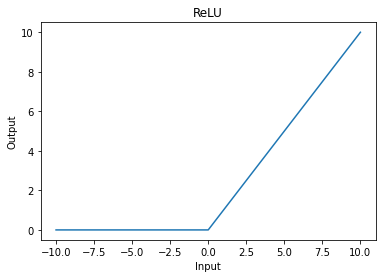

In [3]:
# Initialising the ReLU activation function
relu = torch.nn.ReLU()

# Plotting ReLU to visualise its behaviour
plt.plot(input_tensor, relu(input_tensor))
plt.xlabel('Input')
plt.ylabel('Output')
plt.title("ReLU")
plt.show()

## 2. Other Non-linear Functions

Now, let's explore a variety of other non-linear activation functions in PyTorch. Each activation function has unique properties and behaviours. Here, we will plot a selection of functions and examine their outputs across our input tensor.

We define several popular non-linear functions in a dictionary and iterate over them to plot each one:

In [4]:
# Defining a dictionary of different non-linear activation functions
non_linear_funs = {
    'ELU': torch.nn.ELU(),         # Exponential Linear Unit
    'LeakyReLU': torch.nn.LeakyReLU(), # Allows a small gradient when input is negative
    'PReLU': torch.nn.PReLU(),     # Parametric ReLU with learnable parameter for the slope
    'ReLU6': torch.nn.ReLU6(),     # ReLU with an upper limit at 6
    'SELU': torch.nn.SELU(),       # Scaled ELU, which maintains a self-normalising effect
    'CELU': torch.nn.CELU(),       # Continuously Differentiable ELU
}

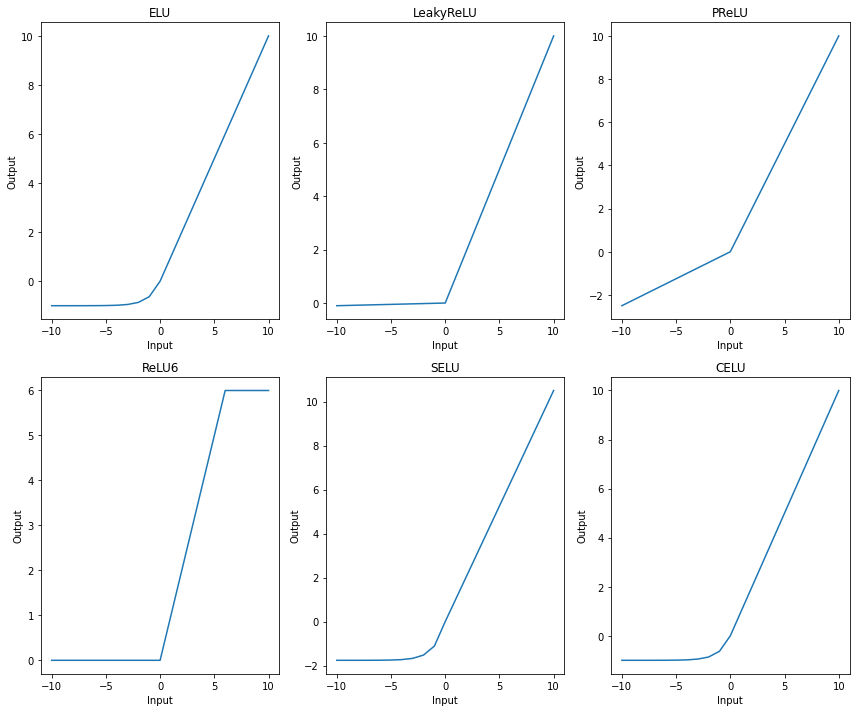

In [5]:
# Setting up a figure to plot each activation function’s behaviour
fig = plt.figure(figsize=(12, 10))
for i, (name, fun) in enumerate(non_linear_funs.items()):
    ax = fig.add_subplot(2, 3, i+1)
    # Applying the activation function and plotting its output
    ax.plot(input_tensor, fun(input_tensor).detach().numpy())
    ax.set_title(name)  # Title of the plot is the function's name
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')

plt.tight_layout()
plt.show()

In this visualisation:

- Each subplot represents one of the activation functions, showing its effect across the input range.
- Note how different functions handle negative values and how some functions have upper limits on the output, which can impact the overall behaviour of the network. For example:
  - **ELU** gradually allows negative values, avoiding sharp transitions.
  - **LeakyReLU** introduces a small slope for negative values, allowing some gradient flow even when inputs are negative.
  - **ReLU6** has an upper limit, restricting the output to the range $[0, 6]$.

These unique characteristics allow you to choose the most appropriate activation function based on the network’s needs and the nature of the data.